In [1]:
from synthetic_data import *
from karimi_synthetic_data import *
from ced import get_causal_effect_derivative, get_interventional_data
from utils import plot_variances, plot_pairgrid
import numpy as np
import pandas as pd

In [2]:
np.random.seed(0)

### Semi-synthetic SCM based on German Dataset

In [3]:
n_samples = 10000
structural_equations = get_structural_equations()


scm = StructuralCausalModel(structural_equations)
df = scm.sample(n_samples=n_samples).astype(float)
df.head()

,G,A,E,L,J,D,I,S,Y
0,1.0,-0.061347,0.740841,1.365685,0.790534,1.611440,1.112888,1.263613,0.686712
1,1.0,0.457059,0.939209,0.374644,1.321672,0.918509,1.660373,1.733768,0.866052
2,-1.0,-1.088813,-0.940443,-1.086399,-1.473207,-1.602914,-2.126511,-2.295490,0.101394
3,1.0,0.695620,1.120572,1.088565,1.370511,0.843350,1.893390,1.878904,0.873726
4,1.0,-0.551751,0.332806,-0.530759,-0.057197,-0.491246,0.081613,0.155061,0.604950


### Causal Effect Derivative

In [4]:
results, data_do = get_causal_effect_derivative(df, proper_std, scm, n_samples=n_samples)

### Semi-synthetic SCM based on German Dataset - Results based on Karimi et al. 

[1] Karimi, A.H., Von Kugelgen, J., Scholkopf, B., Valera, I.: Algorithmic recourse
under imperfect causal knowledge: a probabilistic approach. Advances in neural
information processing systems 33, 265–277 (2020)

In [5]:
n_samples = 10000
structural_equations_karimi = get_karimi_structural_equations()
scm_karimi = StructuralCausalModel(structural_equations_karimi)
df_karimi = scm_karimi.sample(n_samples=n_samples).astype(float)

### Causal Effect Derivative

In [6]:
results_karimi, data_do_karimi = get_causal_effect_derivative(df_karimi, proper_std, 
                                                              scm_karimi, n_samples=n_samples, karimi=True)

In [7]:
table_1 = pd.DataFrame({'CED in [1]': results_karimi, 'Our CED': results})
table_1

,CED in [1],Our CED
G,0.004,0.273
A,0.016,0.329
E,0.000,0.181
L,-0.018,-0.099
J,0.015,0.087
D,-0.021,-0.037
I,0.058,0.137
S,0.038,0.066
Y,0.215,0.518


In [8]:
interventional_df = get_interventional_data(df, data_do)

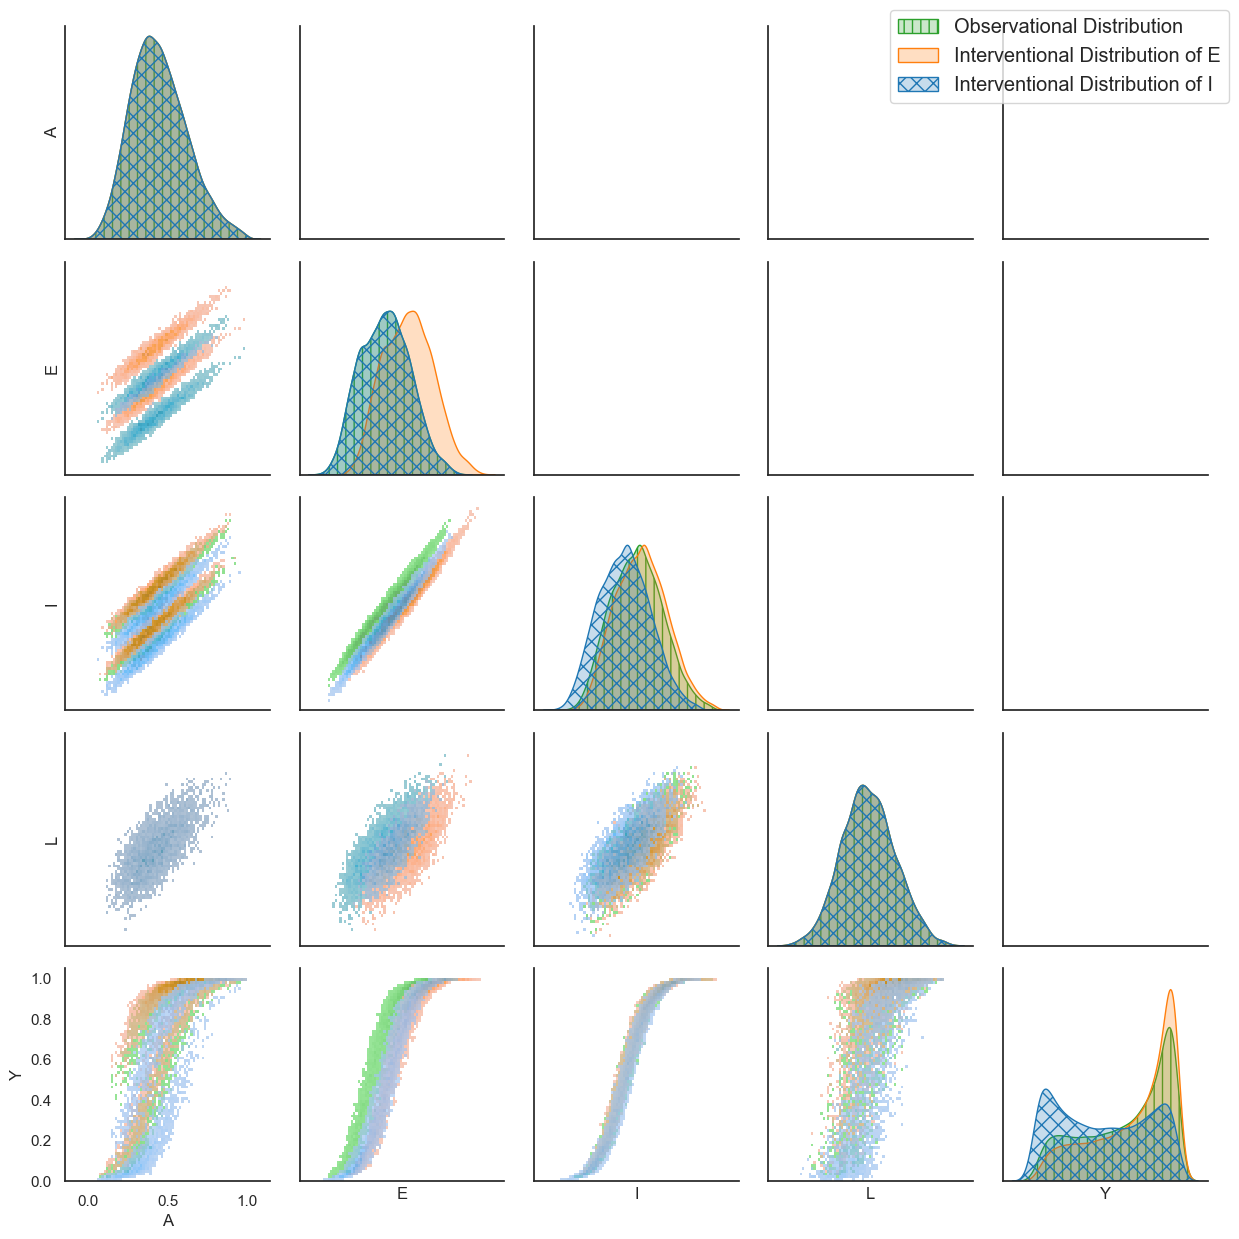

In [9]:
plot_pairgrid(interventional_df)

### Proper Variance

In [10]:
data1 = np.random.normal(-4, 1, size=1000000)
data2 = np.random.normal(4, 2, size=1000000)

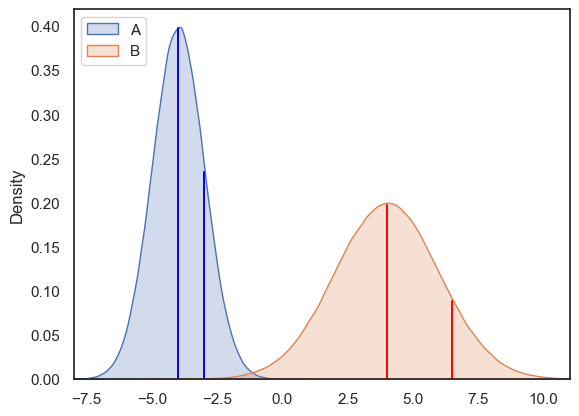

In [11]:
plot_variances(data1, data2)